# Exploring Neural Network Parameters
This exercise serves as a continuation to the Handwritten Digit Recognition example we saw in class. We'll continue with the task and explore how various parameters, such as the number of hidden layers, the number of nodes in a single layer, and various activation functions impact the performance of our neural network.


## Step 1: Data Preparation
We'll use the MNIST dataset of handwritten digits like we did in class. The MNIST dataset is already included in Keras.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to match the input expected by the neural network and normalize pixel values
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encode the labels to create a binary matrix representation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## Step 2: Building the Neural Network
Define a function to build the neural network model with customizable parameters.





In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

# Function to build a neural network model
def build_model(hidden_layers=1, nodes_per_layer=64, activation='relu'):
    # Initialize a Sequential model
    model = Sequential()

    # Add the first hidden layer with the specified number of nodes and activation function
    model.add(Dense(nodes_per_layer, input_shape=(28 * 28,), activation=activation))

    # Add additional hidden layers as specified
    for _ in range(hidden_layers - 1):
        model.add(Dense(nodes_per_layer, activation=activation))

    # Add the output layer with 10 nodes (one for each digit 0-9) and softmax activation function
    model.add(Dense(10, activation='softmax'))

    # Compile the model with Adam optimizer and categorical crossentropy loss function
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


## Step 3: Training the Model
Define a function that train the model with different configurations and evaluate its performance.



In [ ]:
# Function to train and evaluate the model
def train_and_evaluate(hidden_layers, nodes_per_layer, activation, epochs=5, batch_size=128):
    # Build the model with the specified parameters
    model = build_model(hidden_layers, nodes_per_layer, activation)

    # Train the model and store the training history
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)

    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    return history, accuracy


### Example configuration: 2 hidden layers, 128 nodes per layer, ReLU activation function

In [ ]:
history, accuracy = train_and_evaluate(hidden_layers=2, nodes_per_layer=128, activation='relu')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5
469/469 - 3s - loss: 0.3178 - accuracy: 0.9103 - val_loss: 0.1545 - val_accuracy: 0.9539 - 3s/epoch - 6ms/step
Epoch 2/5
469/469 - 3s - loss: 0.1241 - accuracy: 0.9630 - val_loss: 0.1075 - val_accuracy: 0.9660 - 3s/epoch - 6ms/step
Epoch 3/5
469/469 - 3s - loss: 0.0847 - accuracy: 0.9741 - val_loss: 0.0894 - val_accuracy: 0.9722 - 3s/epoch - 6ms/step
Epoch 4/5
469/469 - 2s - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0826 - val_accuracy: 0.9734 - 2s/epoch - 4ms/step
Epoch 5/5
469/469 - 2s - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0799 - val_accuracy: 0.9748 - 2s/epoch - 5ms/step
Accuracy: 97.48%


## Step 4: Experiment with Different Configurations
Now, it's your turn to experiment with the network architecture.



### Task 1: Modify the Number of Hidden Layers

Try out different number of hidden layers to see how it affects the model's performance.

In [ ]:
hidden_layer_configs = [1, 2, 3, 4]
hidden_layer_results = []

# Loop through different configurations for the number of hidden layers
for hl in hidden_layer_configs:
    # Train and evaluate the model with the current number of hidden layers
    history, accuracy = train_and_evaluate(hidden_layers=hl, nodes_per_layer=64, activation='relu')
    hidden_layer_results.append((hl, history, accuracy))
    print(f'Hidden Layers: {hl}, Accuracy: {accuracy*100:.2f}%')


Epoch 1/5
469/469 - 2s - loss: 0.4239 - accuracy: 0.8846 - val_loss: 0.2336 - val_accuracy: 0.9360 - 2s/epoch - 4ms/step
Epoch 2/5
469/469 - 1s - loss: 0.2129 - accuracy: 0.9392 - val_loss: 0.1801 - val_accuracy: 0.9476 - 1s/epoch - 3ms/step
Epoch 3/5
469/469 - 1s - loss: 0.1648 - accuracy: 0.9527 - val_loss: 0.1518 - val_accuracy: 0.9550 - 1s/epoch - 3ms/step
Epoch 4/5
469/469 - 2s - loss: 0.1354 - accuracy: 0.9606 - val_loss: 0.1294 - val_accuracy: 0.9615 - 2s/epoch - 4ms/step
Epoch 5/5
469/469 - 2s - loss: 0.1142 - accuracy: 0.9672 - val_loss: 0.1197 - val_accuracy: 0.9638 - 2s/epoch - 5ms/step
Hidden Layers: 1, Accuracy: 96.38%
Epoch 1/5
469/469 - 2s - loss: 0.3867 - accuracy: 0.8888 - val_loss: 0.1863 - val_accuracy: 0.9442 - 2s/epoch - 5ms/step
Epoch 2/5
469/469 - 2s - loss: 0.1623 - accuracy: 0.9537 - val_loss: 0.1378 - val_accuracy: 0.9587 - 2s/epoch - 3ms/step
Epoch 3/5
469/469 - 2s - loss: 0.1202 - accuracy: 0.9646 - val_loss: 0.1166 - val_accuracy: 0.9642 - 2s/epoch - 3ms/st

### Task 2: Change the Number of Nodes in a Layer

Try out different number of nodes in each layer.

In [ ]:
nodes_per_layer_configs = [32, 64, 128, 256]
nodes_per_layer_results = []

# Loop through different configurations for the number of nodes per hidden layer
for nodes in nodes_per_layer_configs:
    # Train and evaluate the model with the current number of nodes per layer
    history, accuracy = train_and_evaluate(hidden_layers=2, nodes_per_layer=nodes, activation='relu')
    nodes_per_layer_results.append((nodes, history, accuracy))
    print(f'Nodes per Layer: {nodes}, Accuracy: {accuracy*100:.2f}%')


Epoch 1/5
469/469 - 2s - loss: 0.4955 - accuracy: 0.8543 - val_loss: 0.2288 - val_accuracy: 0.9322 - 2s/epoch - 4ms/step
Epoch 2/5
469/469 - 1s - loss: 0.2104 - accuracy: 0.9394 - val_loss: 0.1847 - val_accuracy: 0.9439 - 1s/epoch - 2ms/step
Epoch 3/5
469/469 - 1s - loss: 0.1701 - accuracy: 0.9506 - val_loss: 0.1590 - val_accuracy: 0.9515 - 1s/epoch - 2ms/step
Epoch 4/5
469/469 - 1s - loss: 0.1485 - accuracy: 0.9567 - val_loss: 0.1541 - val_accuracy: 0.9538 - 1s/epoch - 3ms/step
Epoch 5/5
469/469 - 1s - loss: 0.1325 - accuracy: 0.9603 - val_loss: 0.1332 - val_accuracy: 0.9595 - 1s/epoch - 2ms/step
Nodes per Layer: 32, Accuracy: 95.95%
Epoch 1/5
469/469 - 3s - loss: 0.3891 - accuracy: 0.8911 - val_loss: 0.1927 - val_accuracy: 0.9437 - 3s/epoch - 6ms/step
Epoch 2/5
469/469 - 2s - loss: 0.1682 - accuracy: 0.9510 - val_loss: 0.1440 - val_accuracy: 0.9581 - 2s/epoch - 5ms/step
Epoch 3/5
469/469 - 1s - loss: 0.1240 - accuracy: 0.9634 - val_loss: 0.1240 - val_accuracy: 0.9630 - 1s/epoch - 3ms

### Task 3: Activation Functions
Try using different activation functions such as `tanh` or `sigmoid` instead of `relu`.

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh']
activation_function_results = []

# Loop through different activation functions
for activation in activation_functions:
    # Train and evaluate the model with the current activation function
    history, accuracy = train_and_evaluate(hidden_layers=2, nodes_per_layer=64, activation=activation)
    activation_function_results.append((activation, history, accuracy))
    print(f'Activation Function: {activation}, Accuracy: {accuracy*100:.2f}%')


Epoch 1/5
469/469 - 2s - loss: 0.3886 - accuracy: 0.8913 - val_loss: 0.1955 - val_accuracy: 0.9422 - 2s/epoch - 5ms/step
Epoch 2/5
469/469 - 2s - loss: 0.1720 - accuracy: 0.9502 - val_loss: 0.1492 - val_accuracy: 0.9572 - 2s/epoch - 4ms/step
Epoch 3/5
469/469 - 2s - loss: 0.1293 - accuracy: 0.9628 - val_loss: 0.1302 - val_accuracy: 0.9637 - 2s/epoch - 3ms/step
Epoch 4/5
469/469 - 2s - loss: 0.1047 - accuracy: 0.9689 - val_loss: 0.1137 - val_accuracy: 0.9651 - 2s/epoch - 3ms/step
Epoch 5/5
469/469 - 2s - loss: 0.0852 - accuracy: 0.9747 - val_loss: 0.1074 - val_accuracy: 0.9672 - 2s/epoch - 5ms/step
Activation Function: relu, Accuracy: 96.72%
Epoch 1/5
469/469 - 3s - loss: 0.9647 - accuracy: 0.7790 - val_loss: 0.3830 - val_accuracy: 0.9054 - 3s/epoch - 6ms/step
Epoch 2/5
469/469 - 2s - loss: 0.3103 - accuracy: 0.9168 - val_loss: 0.2507 - val_accuracy: 0.9286 - 2s/epoch - 4ms/step
Epoch 3/5
469/469 - 2s - loss: 0.2258 - accuracy: 0.9360 - val_loss: 0.1982 - val_accuracy: 0.9427 - 2s/epoch

## Step 5: Visualizing the Results
Visualize the training history for one of the experiments.

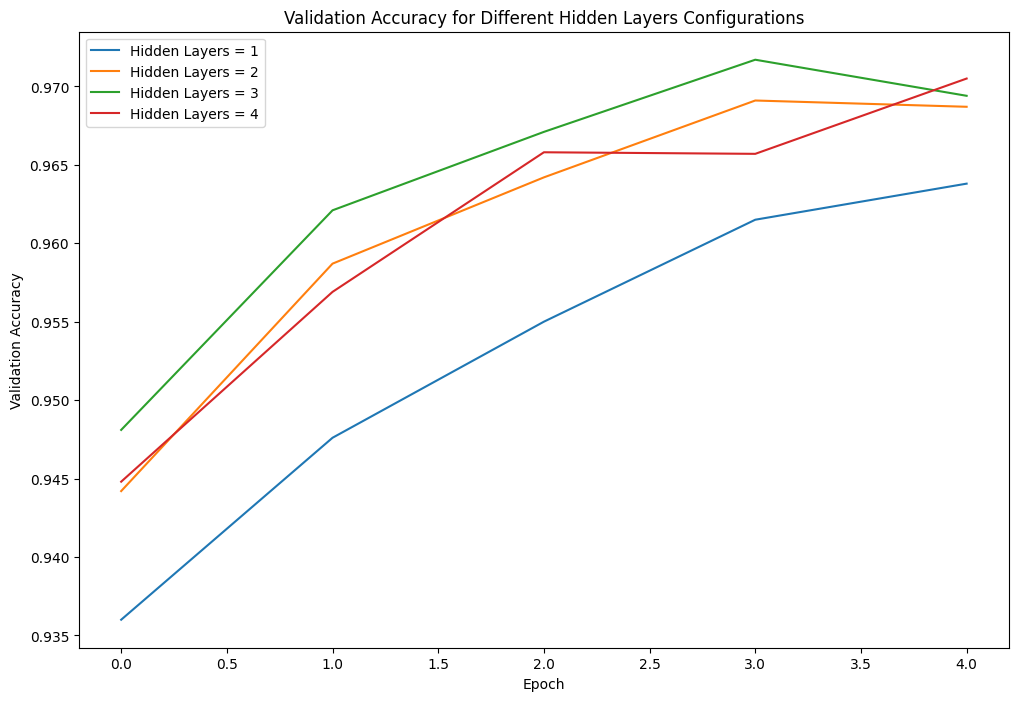

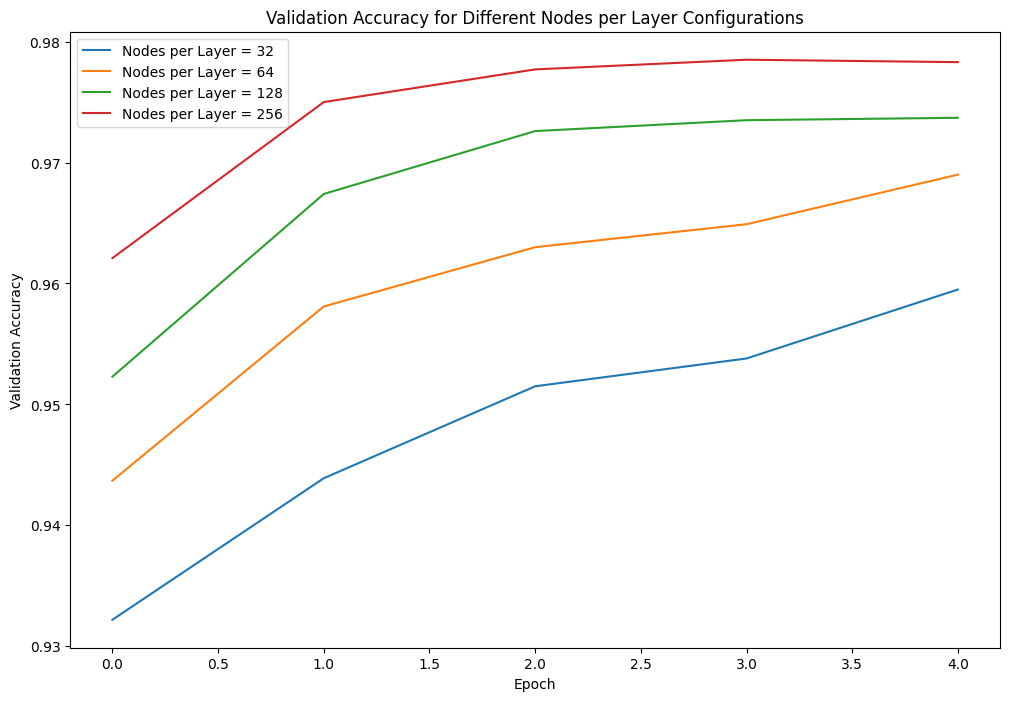

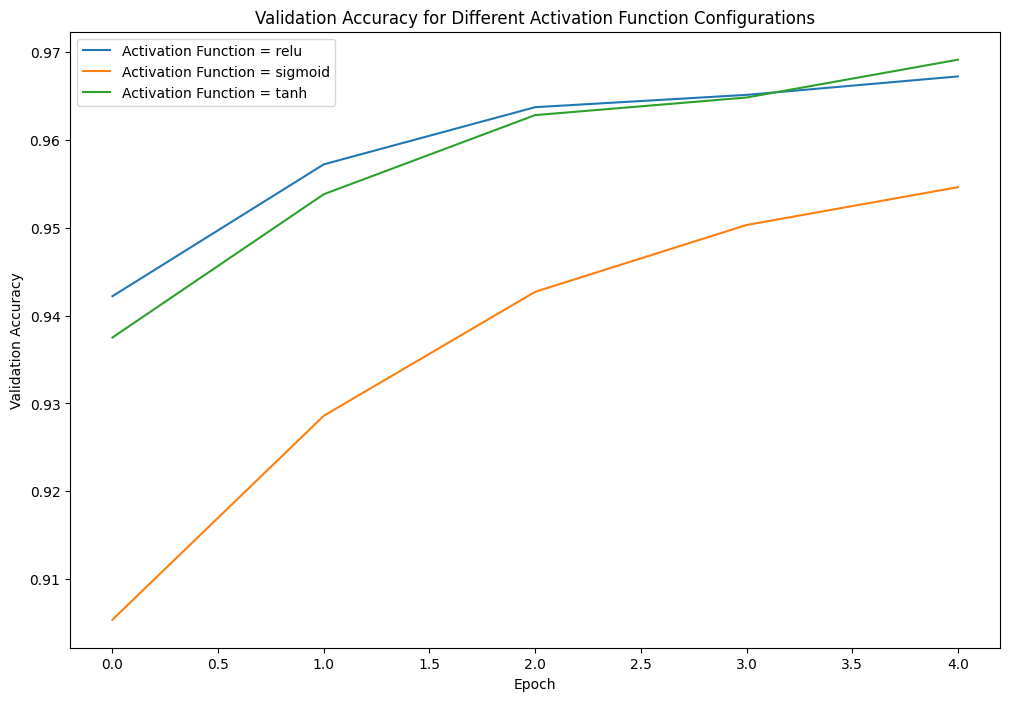

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training history for different configurations
def plot_experiment_results(results, parameter_name):
    plt.figure(figsize=(12, 8))

    for param_value, history, _ in results:
        plt.plot(history.history['val_accuracy'], label=f'{parameter_name} = {param_value}')

    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title(f'Validation Accuracy for Different {parameter_name} Configurations')
    plt.show()

# Plot results for the number of hidden layers
plot_experiment_results(hidden_layer_results, 'Hidden Layers')

# Plot results for the number of nodes per layer
plot_experiment_results(nodes_per_layer_results, 'Nodes per Layer')

# Plot results for the activation functions
plot_experiment_results(activation_function_results, 'Activation Function')


## Step 6: Observations and Analysis
* Record your observations for each experiment.
* Analyze how changes in the network architecture impacted the model's performance.
* Discuss why certain configurations performed better or worse than others.
